In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import wrangle
import pandas as pd
import numpy as np
import os

# Pre-processing Data
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Model
from sklearn.cluster import KMeans
import model

# Custom module
import util

In [2]:
# Combines get_food_data, first_row_to_col_head, drop_cols, and object_to_int functions to acquire and return a prepared dataframe.
df = wrangle.wrangle_food()
df.head(3)

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,11000000,"Milk, human",Human milk,70.0,1.03,6.89,6.89,0.0,4.38,87.50
1,11100000,"Milk, NFS","Milk, reduced fat",51.0,3.34,4.87,4.89,0.0,1.99,89.04
2,11111000,"Milk, whole","Milk, whole",60.0,3.28,4.67,4.81,0.0,3.20,88.10


In [3]:
# Split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# Split validate off, 30% of what remains (24% of original df size)
# Thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  39660
validate observations:  17000
test observations:  14170


### Pre-Processing our Datasets

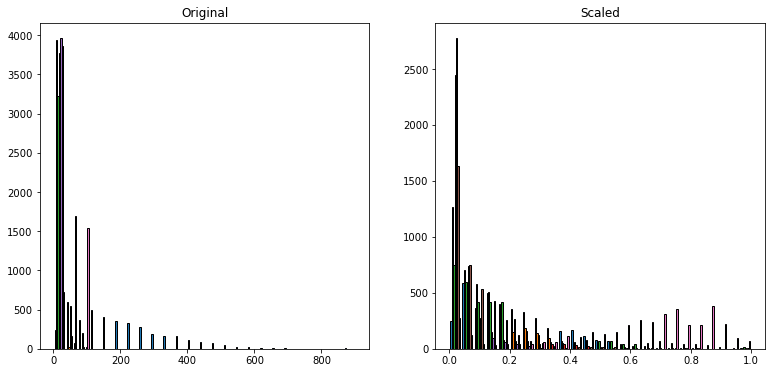

In [4]:
# Accepts train, validate, and test as inputs from split data then returns scaled versions 
# for each one using MinMaxScaler and a chart comparing the original to the scaled version.
scaled_train, scaled_validate, scaled_test = wrangle.scale_food(train, validate, test)

## Clustering Models

In [5]:
# sets variable numerical_cols_and_clusters to list of desired columns
numerical_cols = ['Energy (kcal)',
                  'Protein (g)',
                  'Carbohydrate (g)',
                  'Sugars, total\n(g)',
                  'Fiber, total dietary (g)',
                  'Total Fat (g)',
                  'Water\n(g)']

In [6]:
cols_to_scale = numerical_cols

# Isolating numerical columns from train, validate, and test datasets
scaled_train = scaled_train[cols_to_scale]

scaled_validate = scaled_validate[cols_to_scale]

scaled_test = scaled_test[cols_to_scale]

scaled_set = [scaled_train, scaled_validate, scaled_test]

### K-Means Clustering on numerical columns

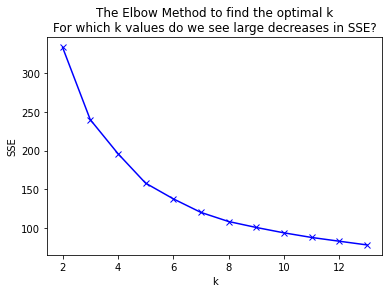

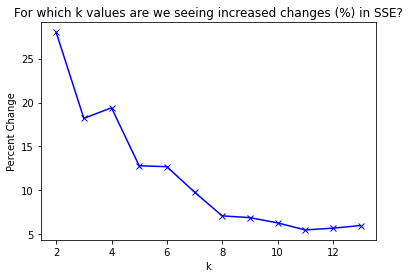

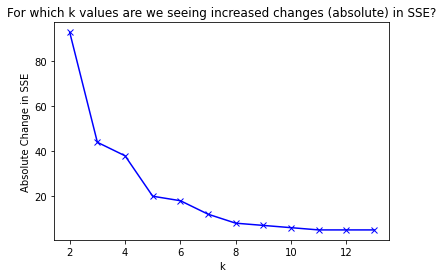

,k,sse,delta,pct_delta
0,2,333.324385,93.0,28.0
1,3,240.050207,44.0,18.2
2,4,196.269168,38.0,19.4
3,5,158.133295,20.0,12.8
4,6,137.904556,18.0,12.7
5,7,120.354465,12.0,9.8
6,8,108.612690,8.0,7.1
7,9,100.940592,7.0,6.9
8,10,94.014329,6.0,6.3
9,11,88.054732,5.0,5.5


In [7]:
k_range = range(2,15)
cluster_name = 'nutrient_cluster'
cluster_vars = numerical_cols
model.find_k(scaled_train, cluster_vars, k_range)

Using the elbow method it appears that the point where K appears to drop off is around 7, which is what I'll use for k going forward

In [8]:
# sets variable k to 7
k = 7

In [9]:
kmeans = model.cluster_maker(scaled_train, k, cluster_vars)

In [10]:
# Makes predictions with scaled training data and adds column for clusters as 'cluster' to original train df
train['cluster'] = kmeans.predict(scaled_train[cluster_vars])
train

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g),cluster
637,14650180,Alfredo sauce with poultry,"Dips, gravies, other sauces",153.0,7.10,1.20,0.72,0.0,13.59,76.53,3
1462,26137140,"Salmon, coated, fried, made with oil",Fish,253.0,20.50,9.85,0.88,0.6,14.08,54.87,5
5474,71405019,"Potato, hash brown, from fresh, with cheese",French fries and other fried white potatoes,221.0,5.10,16.18,1.12,1.4,15.49,61.10,3
765,22201400,"Pork steak or cutlet, breaded or floured, frie...",Pork,306.0,21.07,16.60,1.46,1.0,16.72,43.09,5
1607,26305180,"Crab, canned",Shellfish,83.0,17.88,0.00,0.00,0.0,0.74,79.69,0
...,...,...,...,...,...,...,...,...,...,...,...
5653,72128223,"Turnip greens, canned, cooked, fat added",Other dark green vegetables,41.0,1.32,2.71,0.40,1.3,2.81,91.55,0
2774,32130680,"Egg omelet or scrambled egg, with cheese, toma...",Eggs and omelets,185.0,11.58,1.63,0.79,0.2,14.47,70.58,5
7012,95201500,"Nutritional powder mix, high protein (Herbalife)",Protein and nutritional powders,392.0,53.57,20.38,3.57,0.0,10.71,8.30,2
1147,25112200,"Liver paste or pate, chicken",Liver and organ meats,201.0,13.45,6.55,0.00,0.0,13.10,65.64,5


In [11]:
def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    '''
    Labels clusters for each observation in scaled_train, scaled_validate, & scaled_test
    '''
    for i in range(len(scaled_set)):
        clusters = pd.DataFrame(kmeans.predict(scaled_set[i][cluster_vars]), 
                            columns=[cluster_name], index=scaled_set[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        scaled_set[i] = pd.concat([scaled_set[i], clusters_centroids], axis=1)
    return scaled_set

In [12]:
# fit kmeans 
kmeans = model.cluster_maker(scaled_train, k, cluster_vars)

# get centroid values per variable per cluster
centroid_df = model.get_centroids(kmeans, cluster_vars, cluster_name)

# get cluster assignments and append those with centroids for each X partition (train, validate, test)
scaled_set = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

In [13]:
# Returns the centroids for each cluster for each column and total number for 
# each cluster of our scaled training set
scaled_centroids = pd.DataFrame(scaled_set[0].groupby(['nutrient_cluster', 
                                    'centroid_Energy (kcal)', 
                                    'centroid_Protein (g)',
                                    'centroid_Carbohydrate (g)',
                                    'centroid_Sugars, total\n(g)',
                                    'centroid_Fiber, total dietary (g)',
                                    'centroid_Total Fat (g)',
                                    'centroid_Water\n(g)'])['nutrient_cluster'].count())
scaled_centroids

,,,,,,,,nutrient_cluster
nutrient_cluster,centroid_Energy (kcal),centroid_Protein (g),centroid_Carbohydrate (g),"centroid_Sugars, total (g)","centroid_Fiber, total dietary (g)",centroid_Total Fat (g),centroid_Water (g),
0,0.062159,0.032213,0.076980,0.045426,0.020938,0.016967,0.869939,1096
1,0.462145,0.110850,0.675282,0.161263,0.129277,0.141422,0.070540,310
2,0.316436,0.124163,0.348834,0.086671,0.050802,0.120570,0.410650,575
3,0.163915,0.079289,0.161052,0.033082,0.034249,0.063664,0.694717,1013
4,0.448442,0.058743,0.723849,0.535620,0.050031,0.117169,0.095500,184
5,0.239578,0.274049,0.049847,0.009171,0.006950,0.118385,0.596997,691
6,0.678207,0.160128,0.123905,0.035362,0.084996,0.590561,0.134265,97


### Pairplots of each numerical column with clusters as the different hues

In [14]:
# # sets variable numerical_cols_and_clusters to list of desired columns
numerical_cols_and_clusters = ['Energy (kcal)',
                               'Protein (g)',
                               'Carbohydrate (g)',
                               'Sugars, total\n(g)',
                               'Fiber, total dietary (g)',
                               'Total Fat (g)',
                               'Water\n(g)', 'cluster']

<Figure size 1728x720 with 0 Axes>

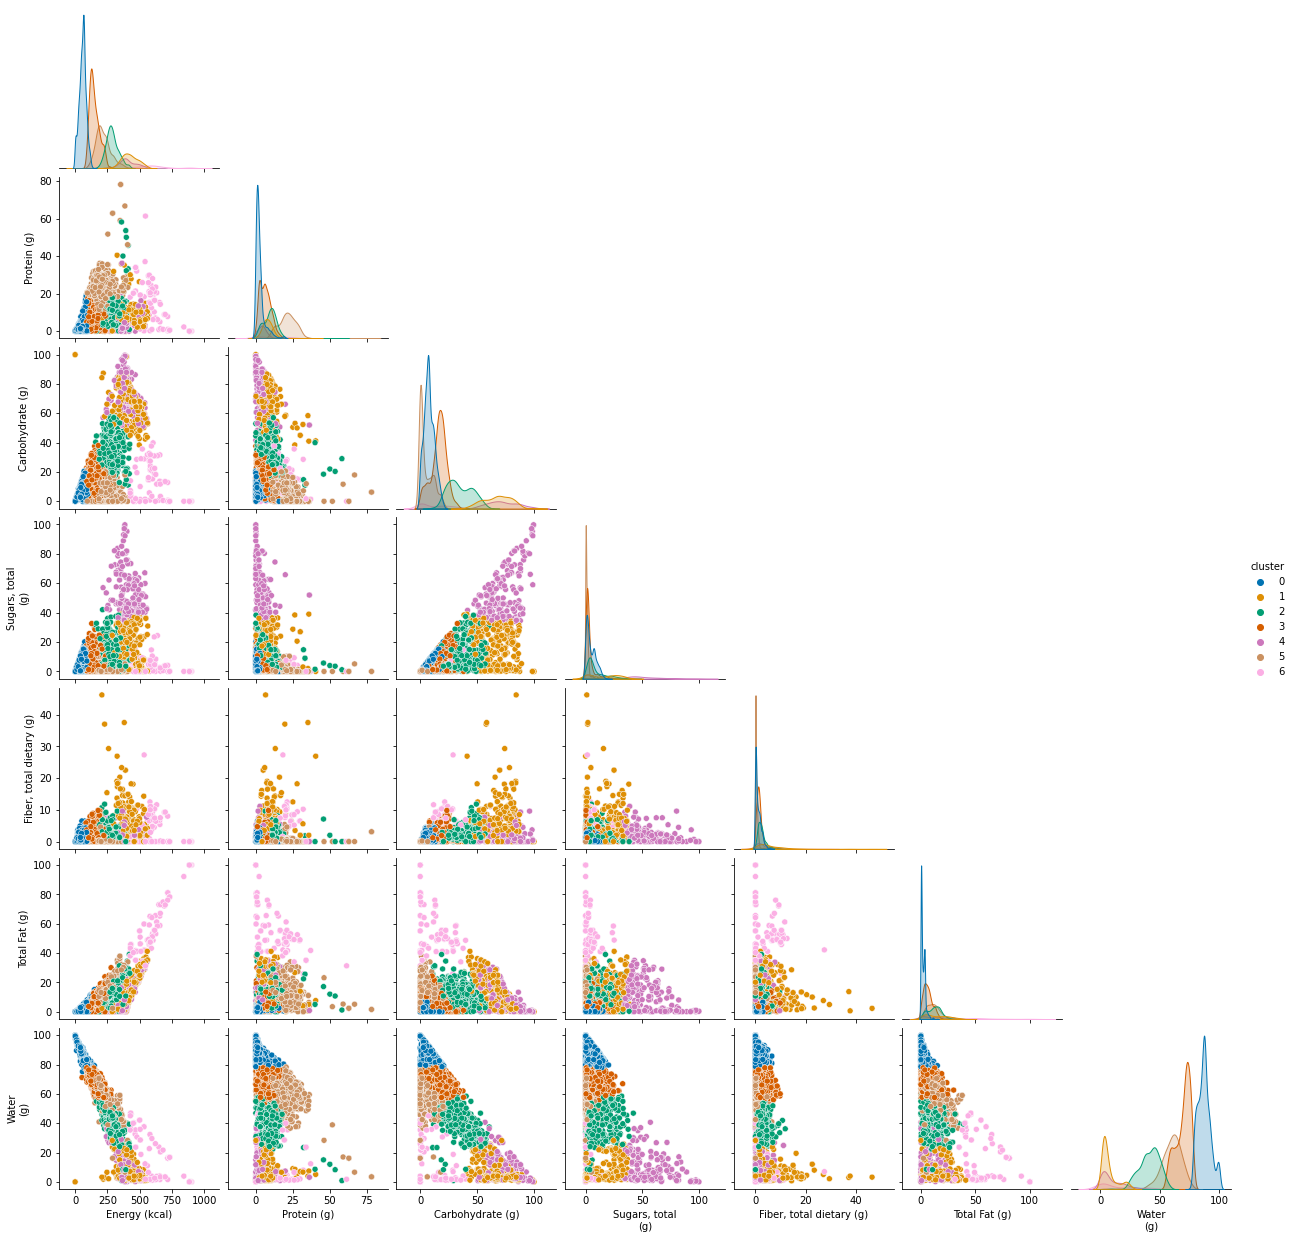

In [15]:
# Shows scatter plots of each unique pair of numerical columns from train 
# dataset colored by cluster as the hue
plt.figure(figsize=(24, 10))
sns.pairplot(train[numerical_cols_and_clusters], hue='cluster', palette='colorblind', corner=True)
plt.show()